In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [18]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\training_LR\training6.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
0,0.283796,0.588021,0.290969,0.282278,0.784029,0.784029,0.784029,0.0,0.784029,0.0,...,0.0,0.0,0.0,0.0,0.138435,0.774979,0.841925,0.729303,0.035697,208500
1,0.092527,0.596101,0.365551,0.329517,0.794802,0.794802,0.794802,0.0,0.397401,0.0,...,0.0,0.0,0.0,0.0,0.366577,0.781355,0.853494,0.739325,0.224365,181500
2,0.276849,0.575928,0.293967,0.377339,0.767904,0.000000,0.767904,0.0,0.767904,0.0,...,0.0,0.0,0.0,0.0,0.645407,0.749653,0.824610,0.714304,0.048948,223500
3,0.325659,0.577848,0.260568,0.317907,0.770464,0.000000,0.770464,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.134972,0.757275,0.827359,0.000000,0.638451,140000
4,0.247985,0.518287,0.326673,0.434552,0.691049,0.000000,0.691049,0.0,0.345525,0.0,...,0.0,0.0,0.0,0.0,0.775564,0.664857,0.742080,0.642814,0.050342,250000


In [19]:
corr=df.corr()

In [20]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
SalePrice,-0.149958,-0.395050,0.113581,0.317537,-0.488240,-0.317057,-0.200098,-0.014314,-0.165933,0.005742,...,0.042390,0.090962,0.085395,-0.026840,-0.098794,-0.573913,-0.307684,-0.001034,-0.571548,1.000000
GrLivArea,0.109397,-0.208915,0.099421,-0.015611,-0.224525,-0.168171,-0.128206,-0.020050,-0.100007,-0.048385,...,0.007700,0.052381,0.053335,-0.037432,-0.011940,-0.271855,-0.175348,-0.041676,-0.228113,0.589120
GarageArea,-0.102609,-0.272965,0.163152,0.069512,-0.206190,-0.167510,-0.007230,0.000376,-0.087617,-0.063508,...,0.027967,0.018784,-0.006017,-0.042975,-0.030864,-0.209394,-0.180956,0.078789,-0.504633,0.505566
GarageCars,-0.025598,-0.226690,0.131242,0.014013,-0.165928,-0.177420,-0.005890,0.001519,-0.085281,-0.069889,...,0.027165,0.015425,-0.017865,-0.060124,-0.016287,-0.172838,-0.147486,0.097013,-0.558473,0.504552
TotalBsmtSF,-0.254642,-0.150886,0.175788,0.059492,-0.126953,-0.170931,0.001812,-0.022100,-0.037908,-0.047332,...,0.030134,0.062056,0.009560,-0.043781,-0.016115,-0.159271,-0.161371,0.024657,-0.400962,0.500621
OverallQual,0.158913,-0.069057,0.056226,-0.338996,0.145592,-0.086879,0.110167,-0.016284,0.046199,-0.166283,...,0.006592,0.005374,-0.027426,-0.061161,0.091586,0.161213,0.009252,0.185739,-0.498392,0.488216
1stFlrSF,-0.244680,-0.102913,0.205277,0.009925,-0.105627,-0.135931,-0.032153,0.002520,-0.040561,-0.039258,...,0.042364,0.054946,0.018800,-0.055110,0.003352,-0.132602,-0.181235,-0.006951,-0.282207,0.436239
MasVnrArea,0.024757,-0.156048,0.043841,0.025674,-0.192391,-0.113695,-0.023828,0.060766,-0.054439,-0.049446,...,0.018037,0.053694,-0.018137,-0.033129,-0.054778,-0.213859,-0.144448,-0.013854,-0.322663,0.426354
Fireplaces,-0.061848,-0.126831,0.074122,0.179437,-0.233658,-0.209772,-0.134864,0.013120,-0.094607,0.033067,...,0.008254,0.169294,0.050150,-0.006998,-0.028060,-0.284568,-0.110770,-0.000086,-0.176910,0.399534
FullBath,0.166597,-0.228867,0.023200,-0.132801,-0.062543,-0.136374,0.037362,-0.034132,0.003399,-0.118610,...,0.025886,-0.061983,-0.011930,-0.036091,0.019664,-0.081209,-0.083164,0.089712,-0.480101,0.395909


In [21]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [22]:
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=10, random_state=42)
svr = SVR(kernel='rbf')

model = VotingRegressor(estimators=[
    ('lr', lr),
    ('dt', dt),
    ('rf', rf),
    ('svr', svr)
])


In [23]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [24]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'GrLivArea', 'GarageArea', 'GarageCars', 'TotalBsmtSF',
       'OverallQual', '1stFlrSF', 'MasVnrArea', 'Fireplaces', 'FullBath'],
      dtype='object')

In [25]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,30344.954287,51323.122617,0.656590
1,11,28794.574715,49190.309857,0.684539
2,12,26943.155407,47280.163524,0.708563
3,13,26753.484892,46711.387610,0.715533
4,14,26941.242684,47038.868101,0.711531
...,...,...,...,...
105,115,23170.289778,41550.070033,0.774924
106,116,23170.289778,41550.070033,0.774924
107,117,23170.289778,41550.070033,0.774924
108,118,23170.289778,41550.070033,0.774924


In [26]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
109,119,23170.289778,41550.070033,0.774924
86,96,23170.289778,41550.070033,0.774924
85,95,23170.289778,41550.070033,0.774924
108,118,23170.289778,41550.070033,0.774924
65,75,23170.289778,41550.070033,0.774924
...,...,...,...,...
11,21,27193.118295,47082.487470,0.710995
5,15,27410.584230,47985.653404,0.699801
6,16,27502.730079,48200.453418,0.697108
1,11,28794.574715,49190.309857,0.684539


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15032\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15032\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


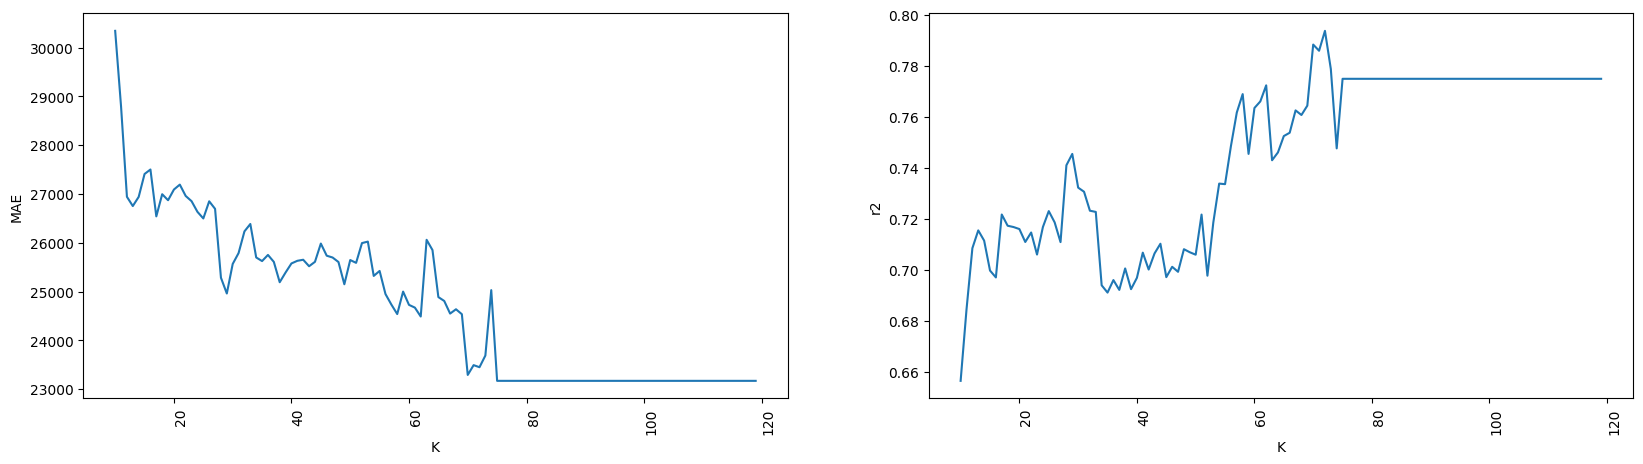

In [27]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [28]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass       4.398967e-02
MSZoning         2.081592e-02
LotFrontage      7.395555e-03
LotArea          1.775773e-02
Street           8.537823e-03
                     ...     
YrSold           8.563767e-03
SaleType         3.334230e-02
SaleCondition    4.257620e-02
Ageofhouse       4.753259e-02
SalePrice        6.306789e+09
Length: 75, dtype: float64

In [29]:
varr.loc[varr > 0.1].index

Index(['LotShape', 'LotConfig', 'HeatingQC', 'SalePrice'], dtype='object')

### 2.USING VarianceThreshold FROM SKLEARN

In [30]:
from sklearn.feature_selection import VarianceThreshold

In [31]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['LotShape', 'LotConfig', 'HeatingQC', 'SalePrice'], dtype='object')

In [32]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/100000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,23170.241458,41267.685112,0.777973
1,101,23170.241458,41267.685112,0.777973
2,102,23281.158302,41214.767961,0.778542
3,103,23281.158302,41214.767961,0.778542
4,104,23281.158302,41214.767961,0.778542
...,...,...,...,...
395,495,23151.865677,39679.730554,0.794731
396,496,23151.865677,39679.730554,0.794731
397,497,23151.865677,39679.730554,0.794731
398,498,23151.865677,39679.730554,0.794731


In [33]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
132,232,23072.733033,41494.497939,0.775525
94,194,23072.733033,41494.497939,0.775525
93,193,23072.733033,41494.497939,0.775525
92,192,23072.733033,41494.497939,0.775525
91,191,23072.733033,41494.497939,0.775525
...,...,...,...,...
282,382,23594.876606,42078.484739,0.769163
281,381,23594.876606,42078.484739,0.769163
280,380,23594.876606,42078.484739,0.769163
278,378,23594.876606,42078.484739,0.769163


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15032\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15032\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


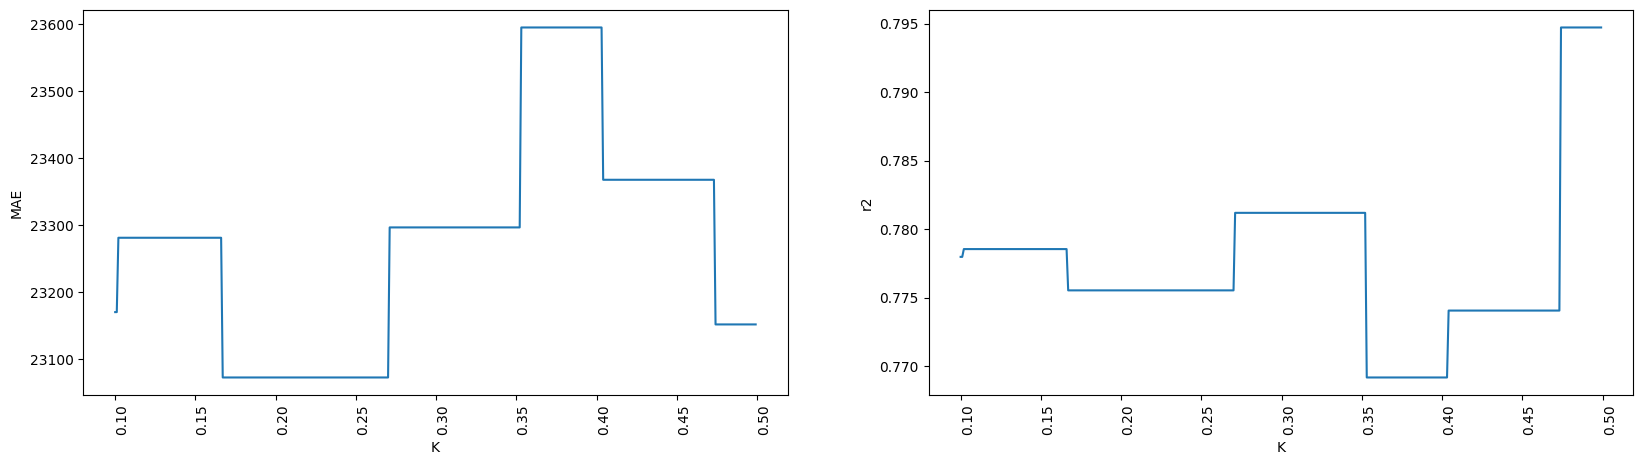

In [34]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


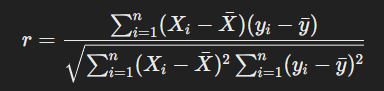

### Using numpy

In [35]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [36]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.4882156521131217


In [37]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

[]

### Using sklearn

In [38]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'], dtype=object)

In [39]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,28931.498195,52048.318715,0.646817
1,6,28845.157102,50889.490125,0.662369
2,7,30233.237950,51642.197003,0.652307
3,8,29208.330987,50299.256145,0.670155
4,9,30514.858734,51282.424979,0.657135
...,...,...,...,...
110,115,22871.529789,41304.159472,0.777580
111,116,22871.529789,41304.159472,0.777580
112,117,22871.529789,41304.159472,0.777580
113,118,22871.529789,41304.159472,0.777580


In [40]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
114,119,22871.529789,41304.159472,0.777580
89,94,22871.529789,41304.159472,0.777580
88,93,22871.529789,41304.159472,0.777580
87,92,22871.529789,41304.159472,0.777580
86,91,22871.529789,41304.159472,0.777580
...,...,...,...,...
0,5,28931.498195,52048.318715,0.646817
5,10,29153.373852,49917.115566,0.675148
3,8,29208.330987,50299.256145,0.670155
2,7,30233.237950,51642.197003,0.652307


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15032\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15032\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


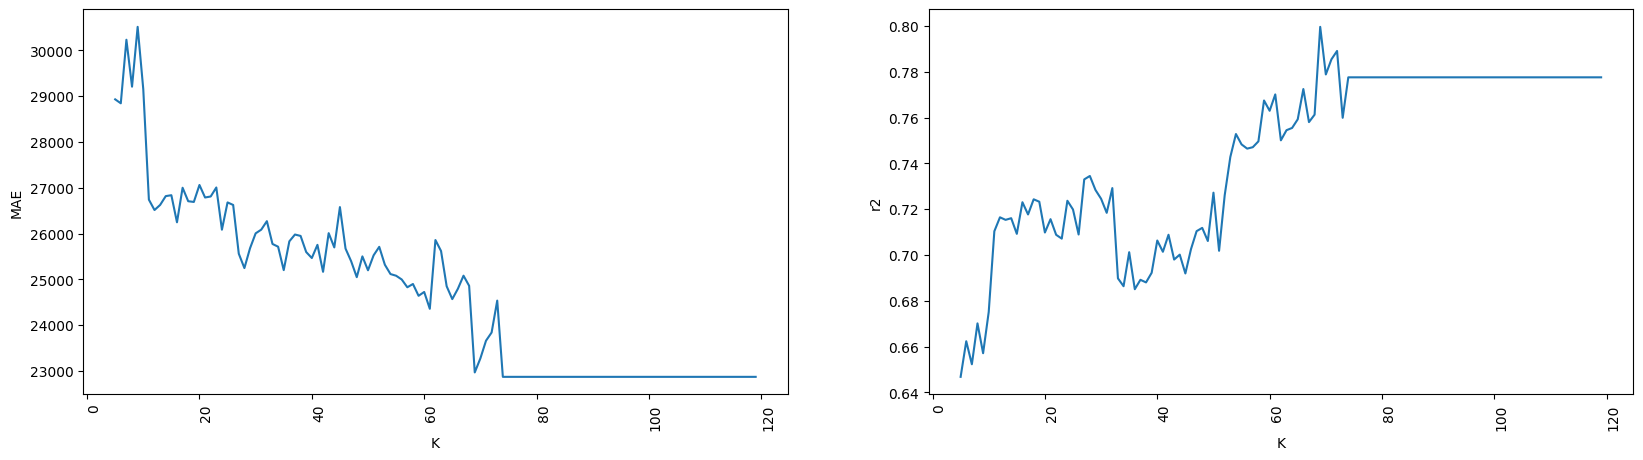

In [41]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

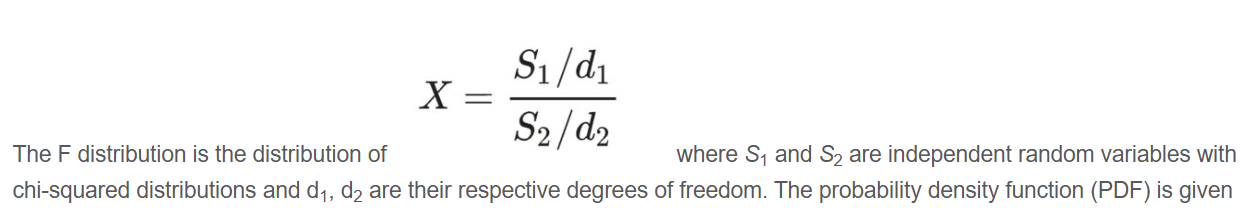

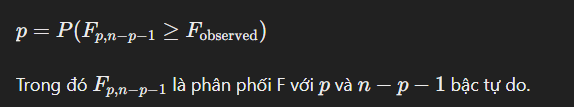

In [42]:
from sklearn.feature_selection import f_regression

In [43]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,27743.717452,44231.641540,0.744934
1,6,27298.732160,42771.956735,0.761491
2,7,26440.362251,42928.177525,0.759746
3,8,26265.708669,42679.197018,0.762525
4,9,26215.981105,42938.131566,0.759634
...,...,...,...,...
110,115,22871.529789,41304.159472,0.777580
111,116,22871.529789,41304.159472,0.777580
112,117,22871.529789,41304.159472,0.777580
113,118,22871.529789,41304.159472,0.777580


In [44]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
29,34,22401.302237,39223.195289,0.799427
34,39,22487.602879,38538.606258,0.806368
35,40,22557.725582,38296.487206,0.808793
28,33,22564.406975,39194.541692,0.799720
32,37,22582.053907,39206.348770,0.799599
...,...,...,...,...
2,7,26440.362251,42928.177525,0.759746
6,11,26528.965963,42872.606232,0.760367
5,10,26627.682632,43116.159032,0.757637
1,6,27298.732160,42771.956735,0.761491


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15032\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15032\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


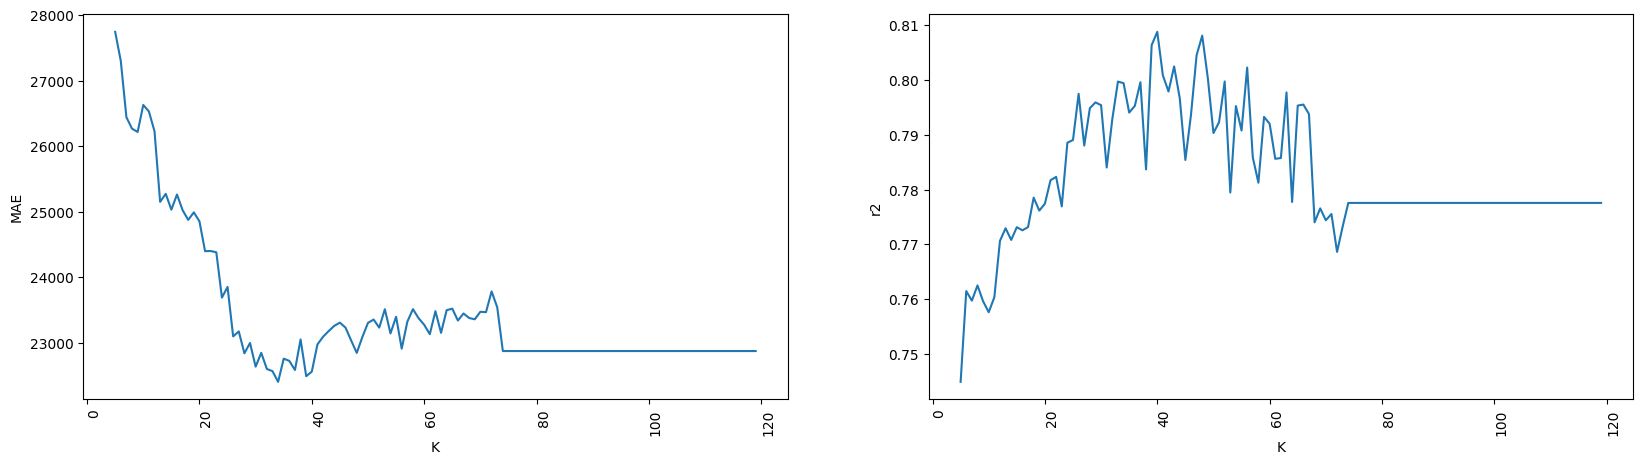

In [45]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

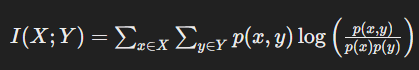

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

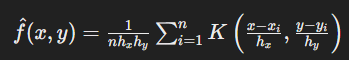

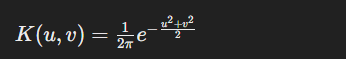

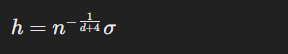

In [46]:
all_col=df.columns
all_col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [47]:
from sklearn.feature_selection import mutual_info_regression

In [48]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,31433.218176,49043.276736,0.686422
1,6,31205.022943,49482.332010,0.680783
2,7,29977.233171,48828.088228,0.689168
3,8,29002.726591,47654.820612,0.703926
4,9,29031.744602,47879.091091,0.701133
...,...,...,...,...
110,115,22871.529789,41304.159472,0.777580
111,116,22871.529789,41304.159472,0.777580
112,117,22871.529789,41304.159472,0.777580
113,118,22871.529789,41304.159472,0.777580


In [49]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [50]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
52,57,22793.928450,41140.607324,0.779338
49,54,22810.742199,40504.716765,0.786107
113,118,22871.529789,41304.159472,0.777580
86,91,22871.529789,41304.159472,0.777580
85,90,22871.529789,41304.159472,0.777580
...,...,...,...,...
4,9,29031.744602,47879.091091,0.701133
5,10,29237.857848,47199.841574,0.709553
2,7,29977.233171,48828.088228,0.689168
1,6,31205.022943,49482.332010,0.680783


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15032\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_15032\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


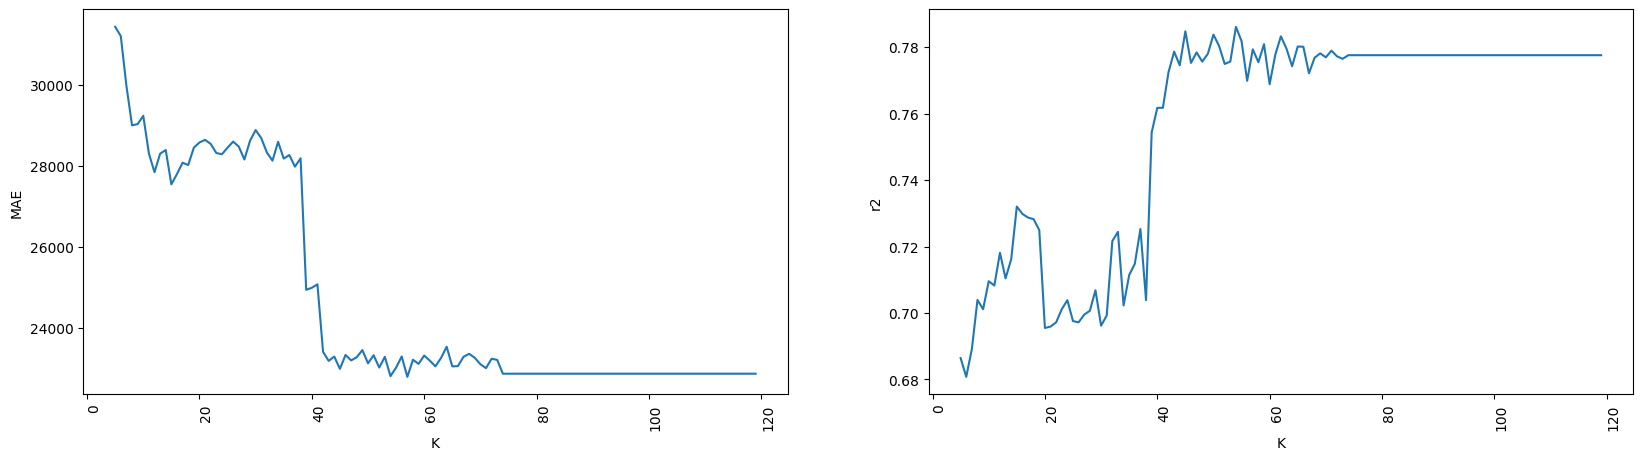

In [51]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [52]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,28931.498195,52048.318715,0.646817
1,6,28845.157102,50889.490125,0.662369
2,7,30233.237950,51642.197003,0.652307
3,8,29208.330987,50299.256145,0.670155
4,9,30514.858734,51282.424979,0.657135
...,...,...,...,...
110,115,22871.529789,41304.159472,0.777580
111,116,22871.529789,41304.159472,0.777580
112,117,22871.529789,41304.159472,0.777580
113,118,22871.529789,41304.159472,0.777580


In [53]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,27743.717452,44231.641540,0.744934
1,6,27298.732160,42771.956735,0.761491
2,7,26440.362251,42928.177525,0.759746
3,8,26265.708669,42679.197018,0.762525
4,9,26215.981105,42938.131566,0.759634
...,...,...,...,...
110,115,22871.529789,41304.159472,0.777580
111,116,22871.529789,41304.159472,0.777580
112,117,22871.529789,41304.159472,0.777580
113,118,22871.529789,41304.159472,0.777580


In [54]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,31433.218176,49043.276736,0.686422
1,6,31205.022943,49482.332010,0.680783
2,7,29977.233171,48828.088228,0.689168
3,8,29002.726591,47654.820612,0.703926
4,9,29031.744602,47879.091091,0.701133
...,...,...,...,...
110,115,22871.529789,41304.159472,0.777580
111,116,22871.529789,41304.159472,0.777580
112,117,22871.529789,41304.159472,0.777580
113,118,22871.529789,41304.159472,0.777580


In [55]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,28931.498195,52048.318715,0.646817,27743.717452,44231.641540,0.744934
1,6,28845.157102,50889.490125,0.662369,27298.732160,42771.956735,0.761491
2,7,30233.237950,51642.197003,0.652307,26440.362251,42928.177525,0.759746
3,8,29208.330987,50299.256145,0.670155,26265.708669,42679.197018,0.762525
4,9,30514.858734,51282.424979,0.657135,26215.981105,42938.131566,0.759634
...,...,...,...,...,...,...,...
110,115,22871.529789,41304.159472,0.777580,22871.529789,41304.159472,0.777580
111,116,22871.529789,41304.159472,0.777580,22871.529789,41304.159472,0.777580
112,117,22871.529789,41304.159472,0.777580,22871.529789,41304.159472,0.777580
113,118,22871.529789,41304.159472,0.777580,22871.529789,41304.159472,0.777580


In [56]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,28931.498195,52048.318715,0.646817,27743.717452,44231.641540,0.744934,31433.218176,49043.276736,0.686422
1,6,28845.157102,50889.490125,0.662369,27298.732160,42771.956735,0.761491,31205.022943,49482.332010,0.680783
2,7,30233.237950,51642.197003,0.652307,26440.362251,42928.177525,0.759746,29977.233171,48828.088228,0.689168
3,8,29208.330987,50299.256145,0.670155,26265.708669,42679.197018,0.762525,29002.726591,47654.820612,0.703926
4,9,30514.858734,51282.424979,0.657135,26215.981105,42938.131566,0.759634,29031.744602,47879.091091,0.701133
...,...,...,...,...,...,...,...,...,...,...
110,115,22871.529789,41304.159472,0.777580,22871.529789,41304.159472,0.777580,22871.529789,41304.159472,0.777580
111,116,22871.529789,41304.159472,0.777580,22871.529789,41304.159472,0.777580,22871.529789,41304.159472,0.777580
112,117,22871.529789,41304.159472,0.777580,22871.529789,41304.159472,0.777580,22871.529789,41304.159472,0.777580
113,118,22871.529789,41304.159472,0.777580,22871.529789,41304.159472,0.777580,22871.529789,41304.159472,0.777580


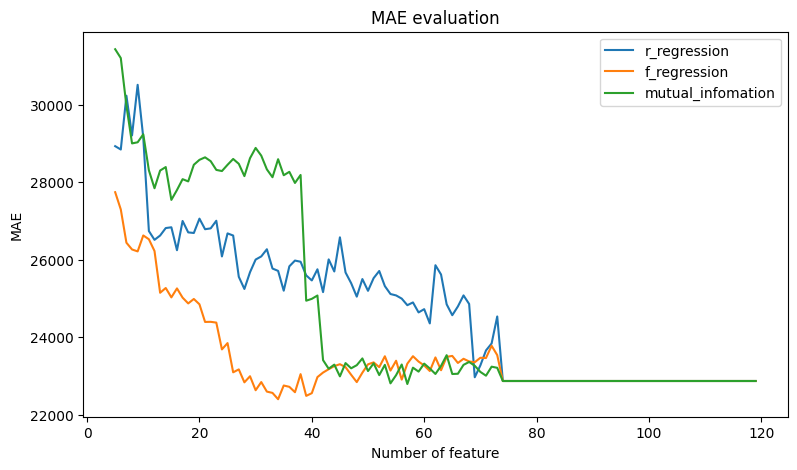

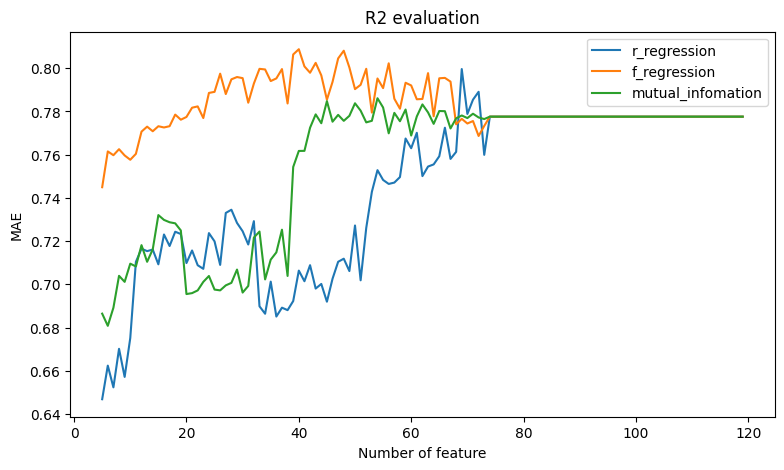

In [57]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()